## 데이터과학 프로젝트

## 오류 해결을 위한 조치

In [1]:
!pip uninstall -y scikit-learn xgboost
!pip install scikit-learn==1.2.2 xgboost==1.6.2


Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: xgboost 1.6.2
Uninstalling xgboost-1.6.2:
  Successfully uninstalled xgboost-1.6.2
  Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached xgboost-1.6.2-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
Using cached xgboost-1.6.2-py3-none-manylinux2014_x86_64.whl (255.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [39]:
!pip uninstall -y xgboost scikit-learn
!pip install scikit-learn xgboost


Found existing installation: xgboost 2.1.3
Uninstalling xgboost-2.1.3:
  Successfully uninstalled xgboost-2.1.3
Found existing installation: scikit-learn 1.6.0
Uninstalling scikit-learn-1.6.0:
  Successfully uninstalled scikit-learn-1.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.7 MB/s eta 0:00:00


In [2]:
from xgboost import XGBRegressor

class SklearnCompatibleXGBRegressor(XGBRegressor):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def __sklearn_tags__(self):
        return {"allow_nan": False, "requires_y": True, "multioutput": False}


In [5]:
from sklearn.base import BaseEstimator, RegressorMixin
from xgboost import XGBRegressor

class SklearnCompatibleXGBRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, **kwargs):
        self.model = XGBRegressor(**kwargs)

    def fit(self, X, y, **kwargs):
        self.model.fit(X, y, **kwargs)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def get_params(self, deep=True):
        return self.model.get_params(deep)

    def set_params(self, **params):
        self.model.set_params(**params)
        return self

# 재조정

In [6]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.datasets import make_regression

# 데이터 생성
X_train, y_train = make_regression(n_samples=100, n_features=10, random_state=42)

# 커스텀 래퍼 사용
xgb = SklearnCompatibleXGBRegressor(random_state=42)

# 하이퍼파라미터 공간
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# 하이퍼파라미터 튜닝
scorer = make_scorer(mean_squared_error, greater_is_better=False)
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    scoring=scorer,
    cv=3,
    n_iter=10,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# 모델 학습
random_search_xgb.fit(X_train, y_train)
best_xgb = random_search_xgb.best_estimator_

print("XGBoost Best Params:", random_search_xgb.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


XGBoost Best Params: {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)



========== Train Data EDA Score Board ==========

[1] Basic Info & Shape of Train Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40118 entries, 0 to 40117
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      40118 non-null  object 
 1   x_0     40118 non-null  float64
 2   x_1     40118 non-null  float64
 3   x_2     40118 non-null  float64
 4   x_3     40118 non-null  float64
 5   x_4     40118 non-null  float64
 6   x_5     40118 non-null  float64
 7   x_6     40118 non-null  float64
 8   x_7     40118 non-null  float64
 9   x_8     40118 non-null  float64
 10  x_9     40118 non-null  float64
 11  x_10    40118 non-null  float64
 12  y       40118 non-null  float64
dtypes: float64(12), object(1)
memory usage: 4.0+ MB
None
Shape: (40118, 13)

[2] Missing Values in Train Data
No missing values.

[3] Descriptive Statistics of Train Data
                x_0           x_1           x_2           x_3           x_4 

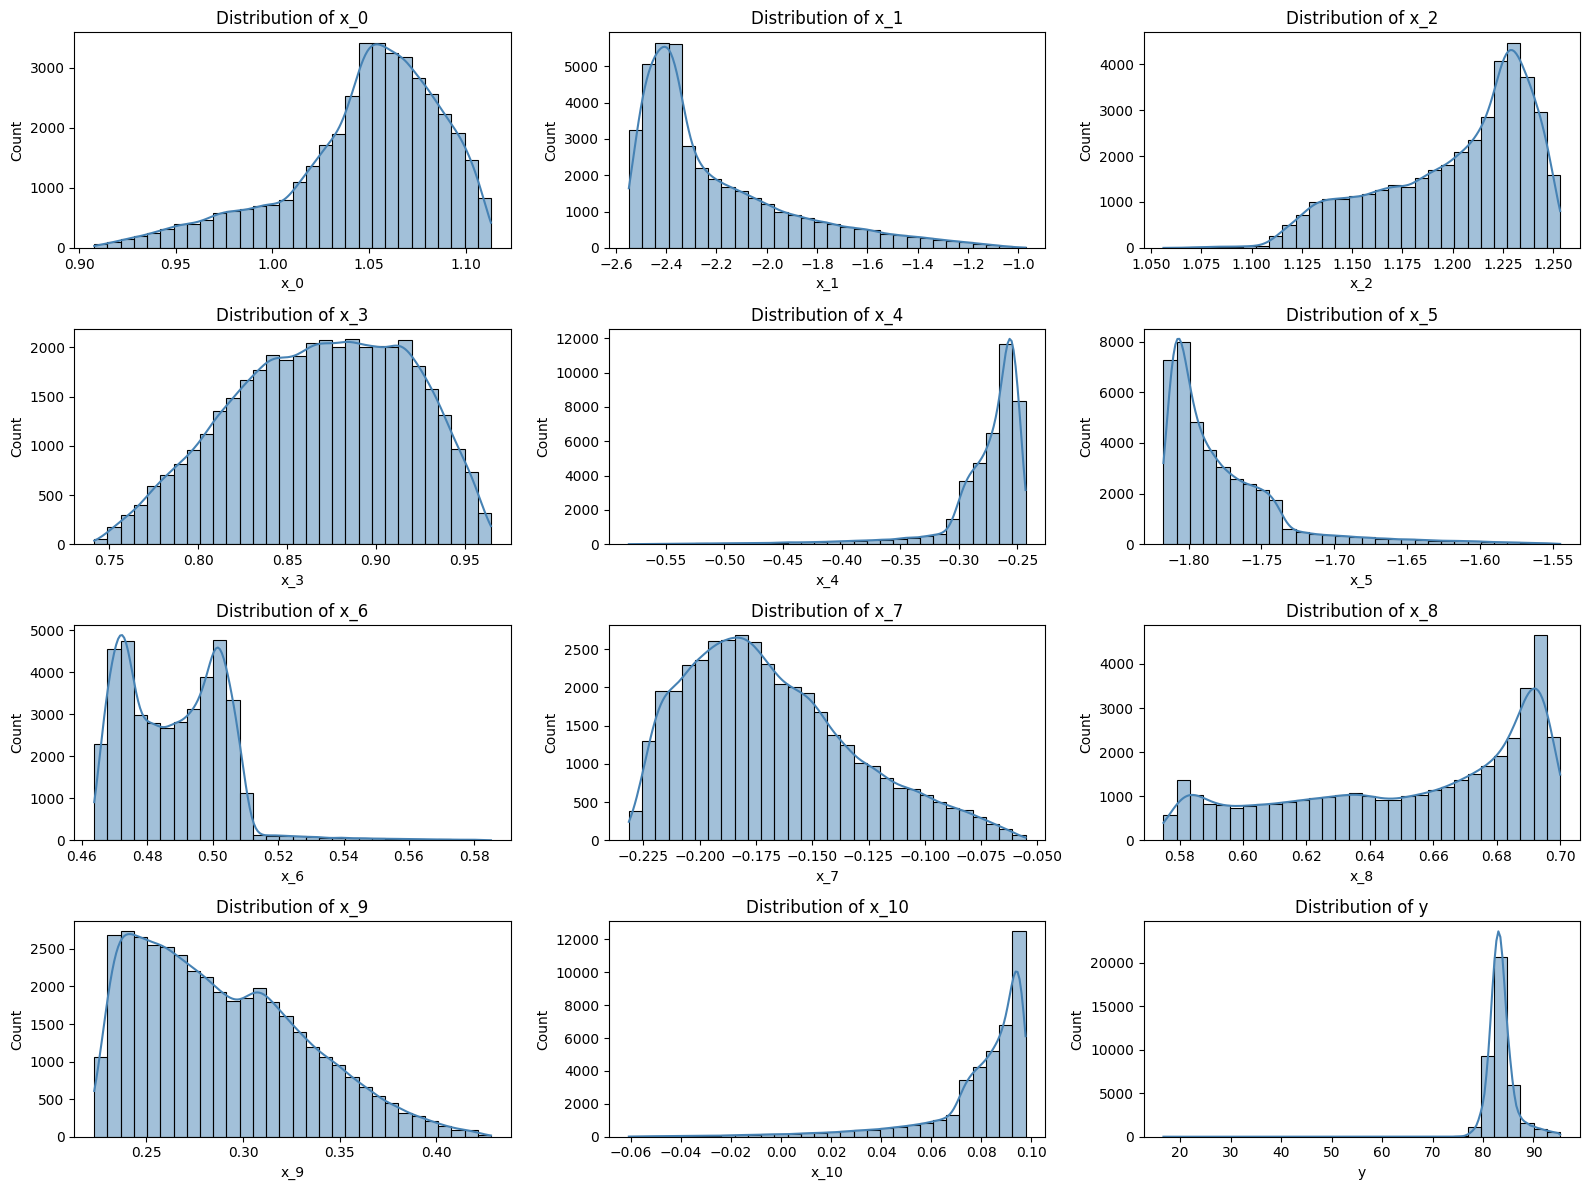

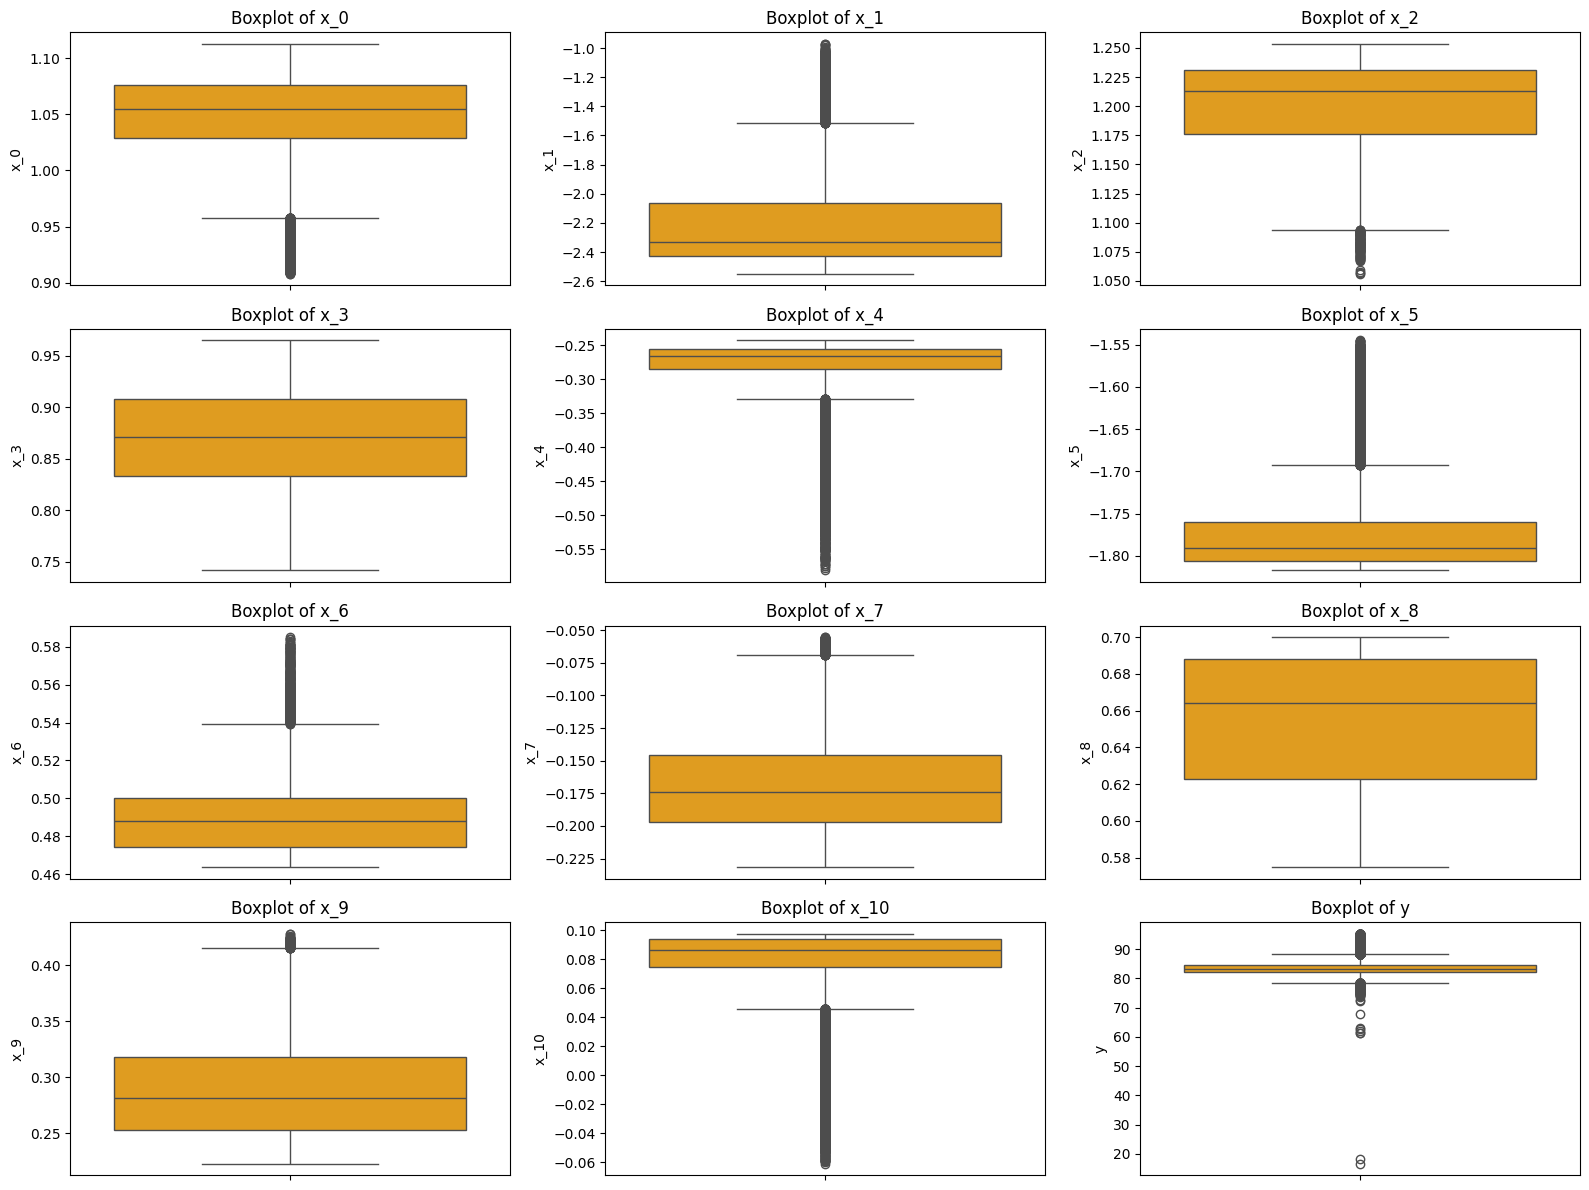

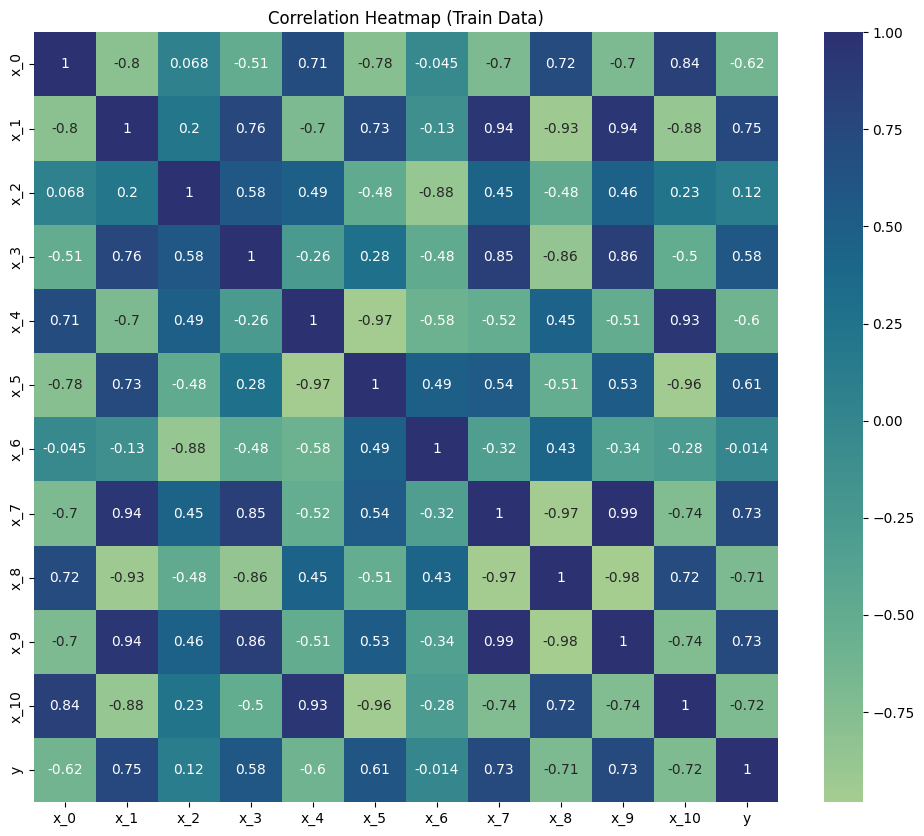

Numeric columns > 6, skipping pairplot to avoid heavy computation.


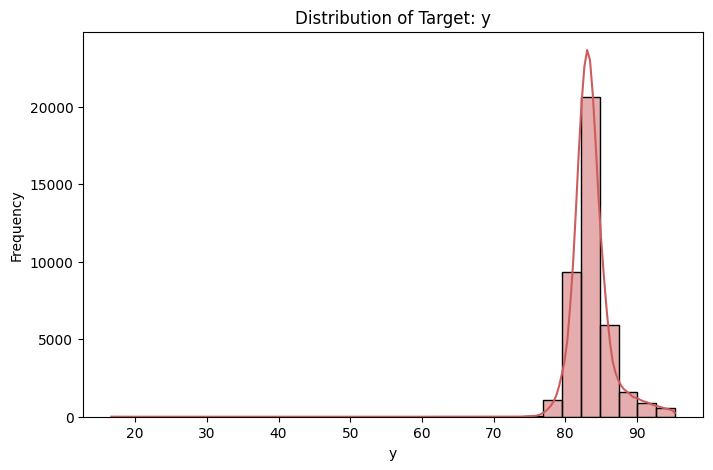


Correlation with Target (y):
y       1.000000
x_1     0.749408
x_7     0.733974
x_9     0.730894
x_5     0.609798
x_3     0.582873
x_2     0.118969
x_6    -0.013633
x_4    -0.600099
x_0    -0.620384
x_8    -0.707139
x_10   -0.716420
Name: y, dtype: float64

========== End of Train Data EDA ==========


========== Test Data EDA Score Board ==========

[1] Basic Info & Shape of Test Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4986 entries, 0 to 4985
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      4986 non-null   object 
 1   x_0     4986 non-null   float64
 2   x_1     4986 non-null   float64
 3   x_2     4986 non-null   float64
 4   x_3     4986 non-null   float64
 5   x_4     4986 non-null   float64
 6   x_5     4986 non-null   float64
 7   x_6     4986 non-null   float64
 8   x_7     4986 non-null   float64
 9   x_8     4986 non-null   float64
 10  x_9     4986 non-null   float64
 11  x_10    4986 non-

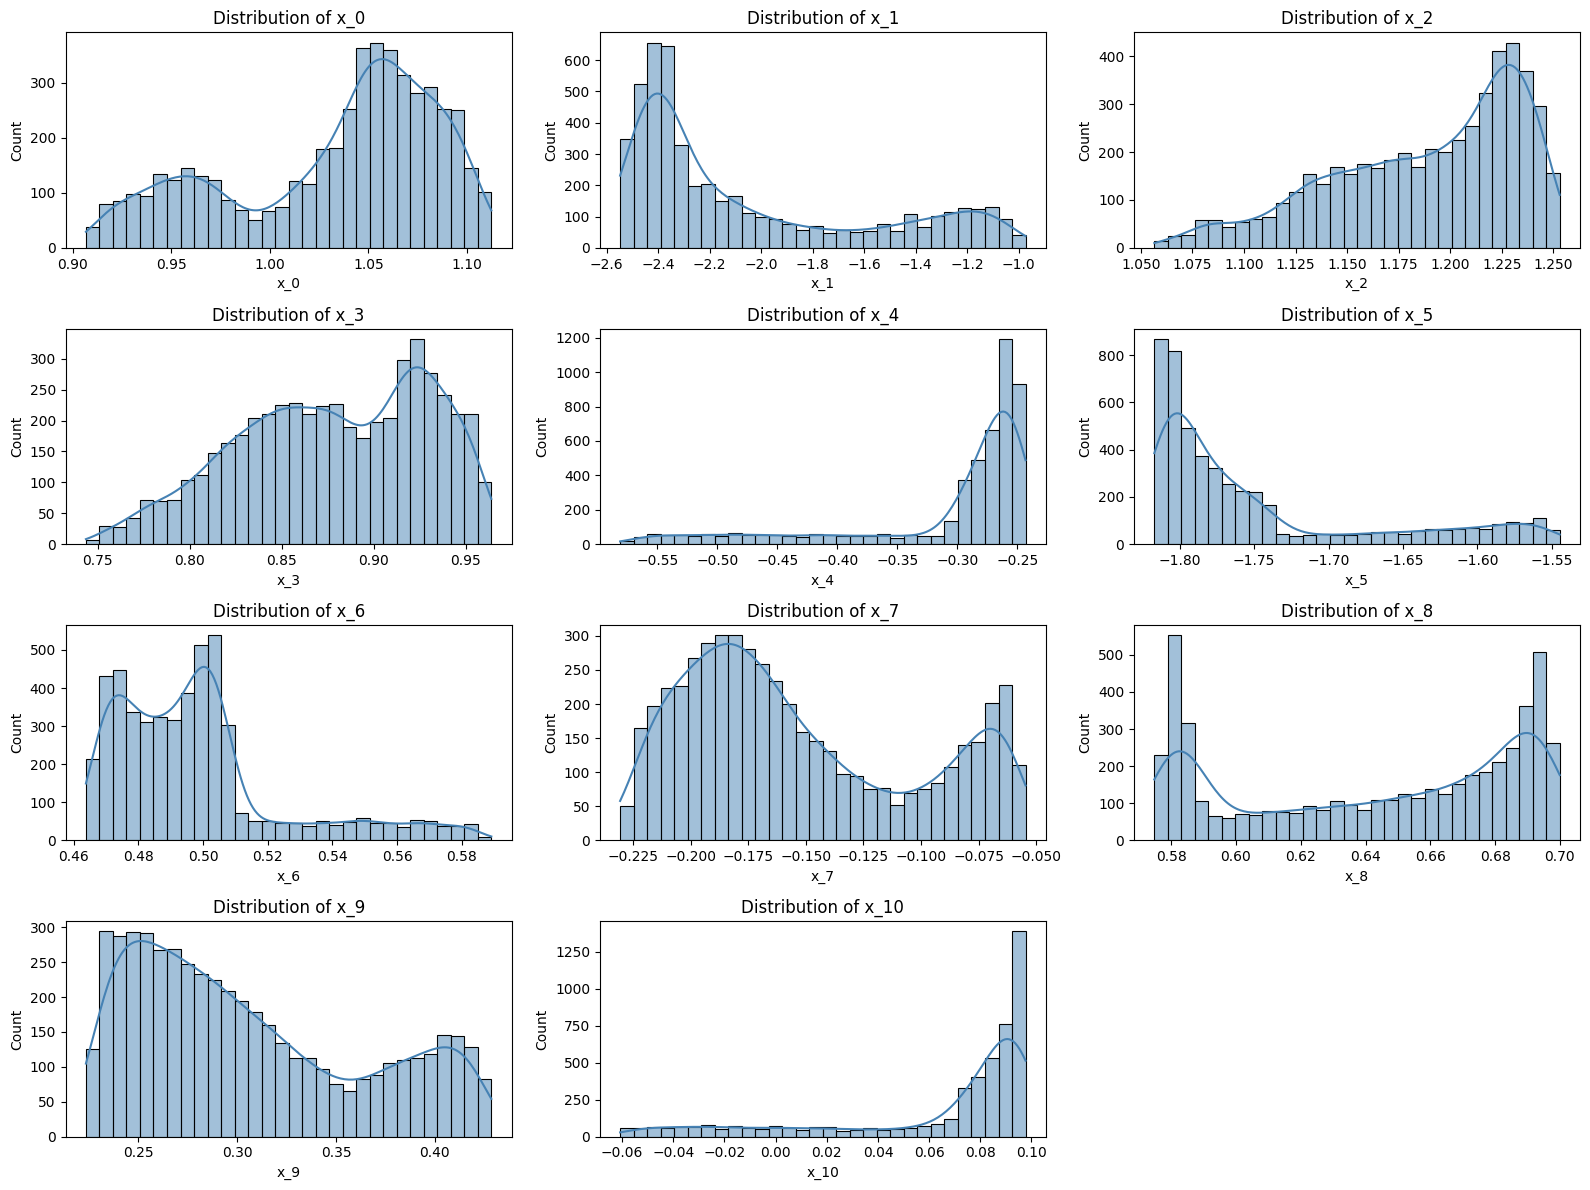

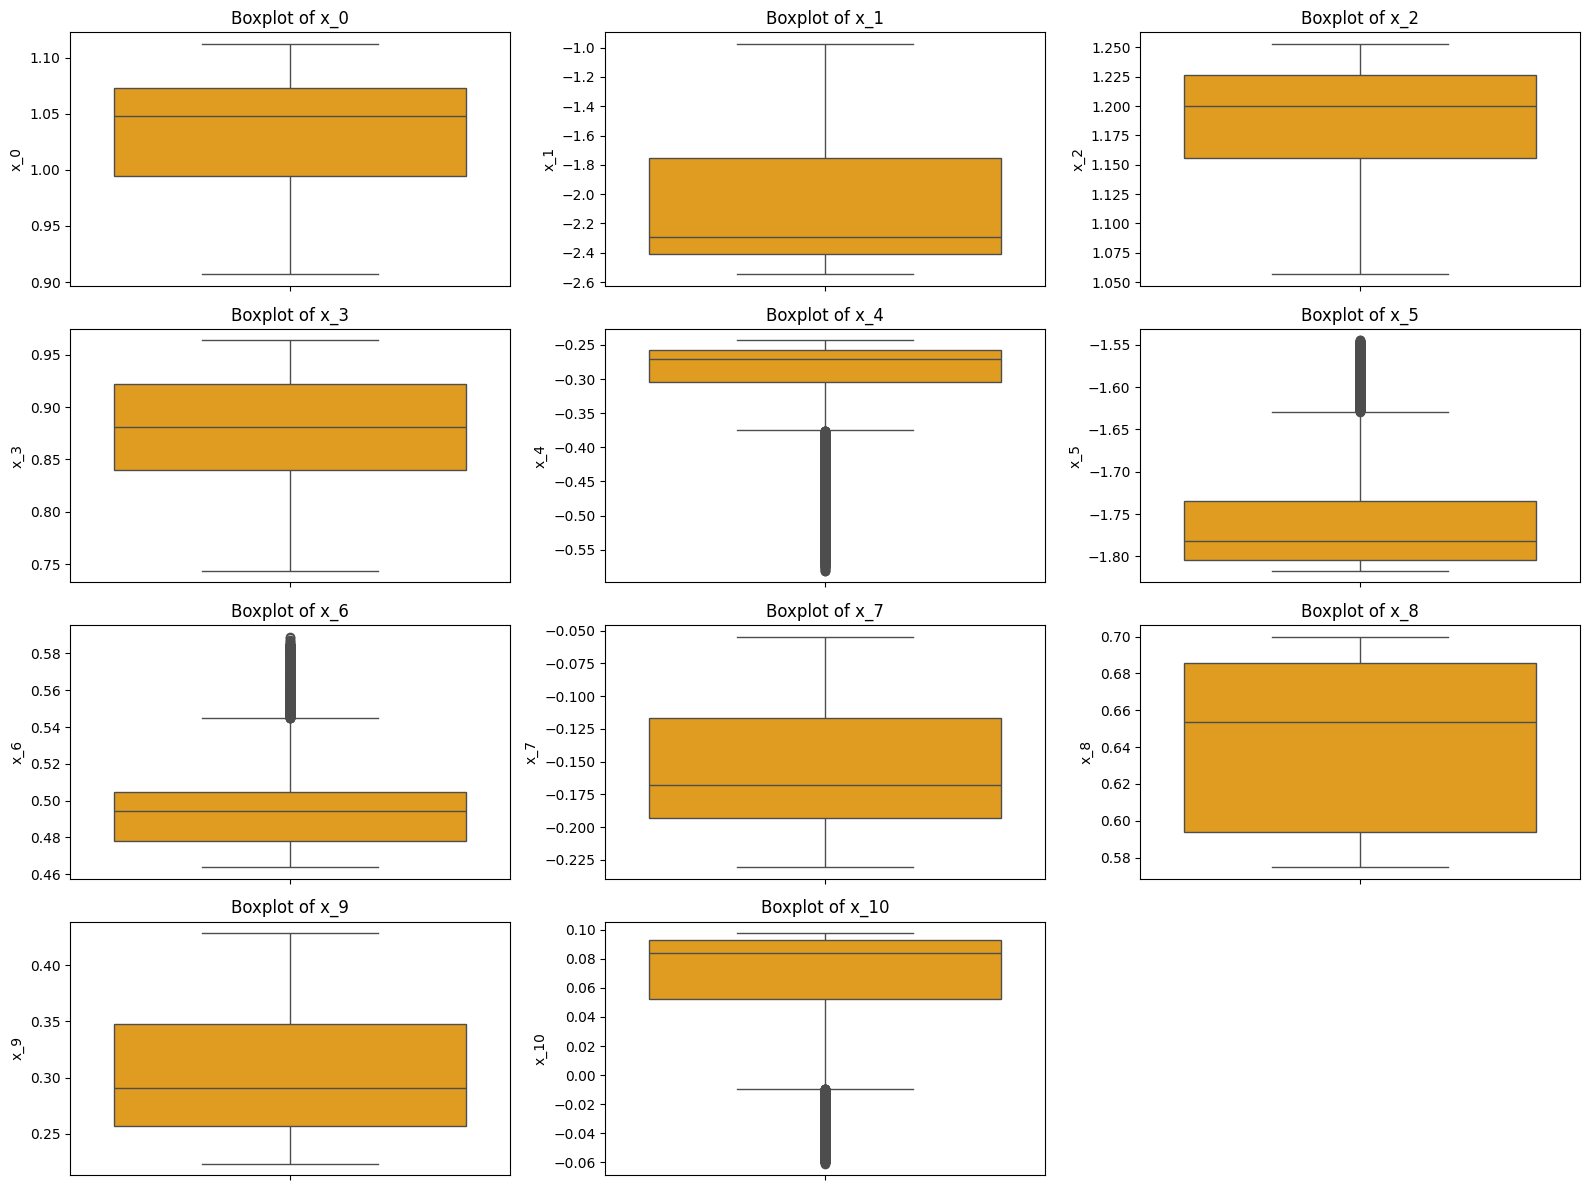

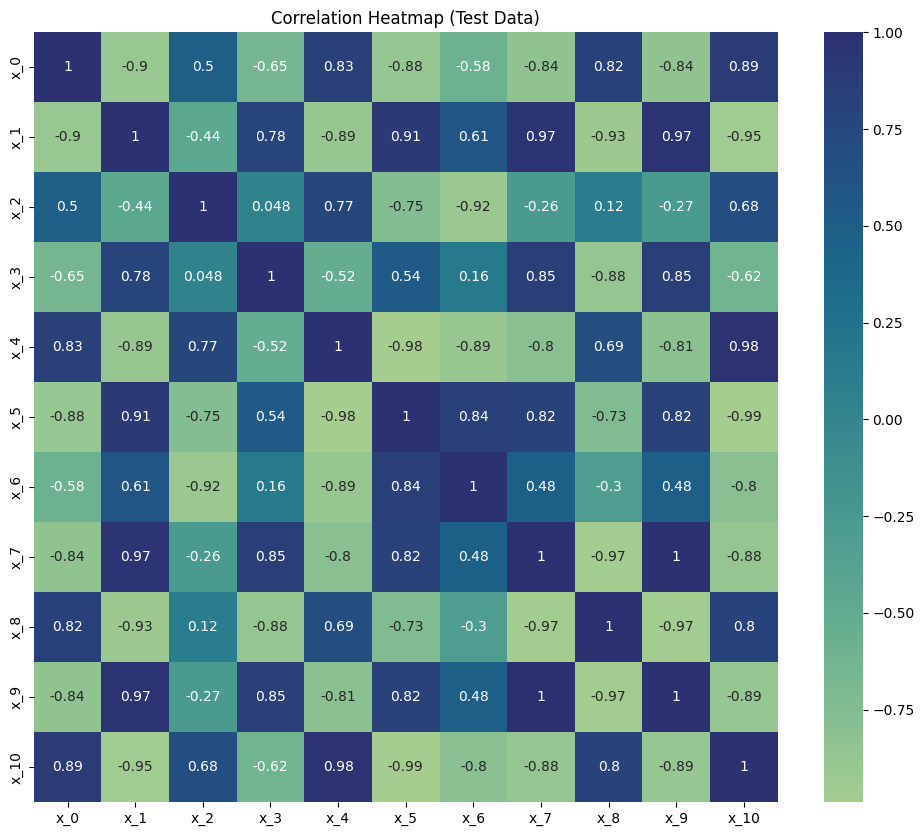

Numeric columns > 6, skipping pairplot to avoid heavy computation.

No target column specified or column not in df.

========== End of Test Data EDA ==========

Dropped 'ID' and 'y' from training features.
Dropped 'ID' from test features.
Completed IterativeImputer for train and test data.
Added interaction feature: x_1 * x_7
Completed outlier clipping.
Completed scaling and train/validation split.
Defined custom recall metric.
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Random Forest Best Params: {'max_depth': 10, 'n_estimators': 100}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
XGBoost Best Params: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060

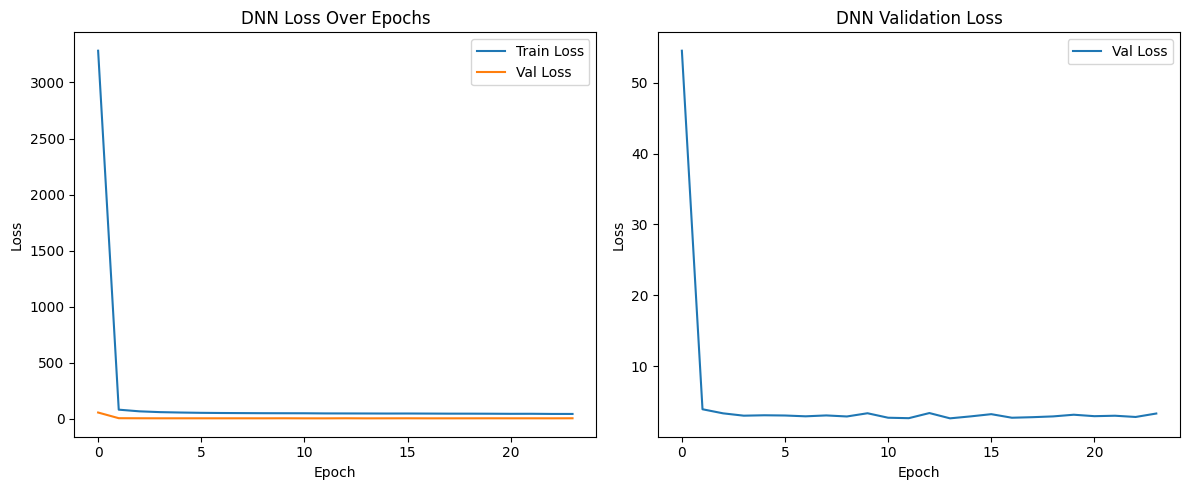

251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[Val] DNN Recall: 0.8905
Model Weights based on Recall: RF=0.25, XGB=0.25, LGBM=0.25, DNN=0.25
[Val] Ensemble Recall: 0.8955
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


FileNotFoundError: [Errno 2] No such file or directory: 'sample_submission.csv'

In [7]:
########################
# 0. 라이브러리 임포트
########################
import pandas as pd
import numpy as np

# EDA, 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.experimental import enable_iterative_imputer  # for IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

# 모델들
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor  # 추가 모델

# ML Utility
from sklearn.metrics import make_scorer
from sklearn.utils import shuffle

# 딥러닝
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 기타
import warnings
warnings.filterwarnings('ignore')  # 경고 무시

# EDA 편의상 옵션
pd.set_option('display.max_columns', None)  # 모든 컬럼이 보이도록
pd.set_option('display.width', 1000)


########################
# 1. EDA Score Board 함수 정의
########################
def eda_score_board(df, df_name="DataFrame", target_col=None, bins=30):
    """
    df:       분석할 pandas DataFrame
    df_name:  프린팅 시 DataFrame 이름표
    target_col: 타겟 컬럼 이름(있으면 추가 분석)
    bins:     히스토그램 bin 수
    """

    print(f"\n========== {df_name} EDA Score Board ==========")

    # 1) 기본 정보
    print(f"\n[1] Basic Info & Shape of {df_name}")
    print(df.info())
    print(f"Shape: {df.shape}")

    # 2) 결측치
    print(f"\n[2] Missing Values in {df_name}")
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    if missing.empty:
        print("No missing values.")
    else:
        print(missing)

    # 3) 통계 요약
    print(f"\n[3] Descriptive Statistics of {df_name}")
    print(df.describe())

    # 4) 히스토그램 (수치형 컬럼들만)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        plt.figure(figsize=(16, 12))
        for i, col in enumerate(numeric_cols):
            plt.subplot((len(numeric_cols) - 1)//3 + 1, 3, i+1)
            sns.histplot(df[col], bins=bins, kde=True, color='steelblue')
            plt.title(f"Distribution of {col}")
        plt.tight_layout()
        plt.show()

        # 박스플롯
        plt.figure(figsize=(16, 12))
        for i, col in enumerate(numeric_cols):
            plt.subplot((len(numeric_cols) - 1)//3 + 1, 3, i+1)
            sns.boxplot(data=df, y=col, color='orange')
            plt.title(f"Boxplot of {col}")
        plt.tight_layout()
        plt.show()

    else:
        print("No numeric columns to plot histograms or boxplots.")

    # 5) 상관관계 히트맵(수치형만)
    if len(numeric_cols) > 1:
        corr_matrix = df[numeric_cols].corr()
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_matrix, annot=True, cmap='crest')
        plt.title(f"Correlation Heatmap ({df_name})")
        plt.show()

    # 6) Pairplot (컬럼이 많지 않을 때만)
    if len(numeric_cols) <= 6:  # 6개 이하만 예시로 제한
        print(f"\nPlotting pairplot for numeric columns (<=6).")
        sns.pairplot(df[numeric_cols], diag_kind='hist', corner=True)
        plt.show()
    else:
        print(f"Numeric columns > 6, skipping pairplot to avoid heavy computation.")

    # 7) 타겟 분포 및 타겟과의 상관관계
    if target_col and target_col in df.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[target_col], bins=bins, kde=True, color='indianred')
        plt.title(f"Distribution of Target: {target_col}")
        plt.xlabel(target_col)
        plt.ylabel('Frequency')
        plt.show()

        # 타겟과 다른 피처의 상관관계만 모아서 확인
        if len(numeric_cols) > 1:
            target_corr = df[numeric_cols].corr()[target_col].sort_values(ascending=False)
            print(f"\nCorrelation with Target ({target_col}):")
            print(target_corr)
    else:
        print("\nNo target column specified or column not in df.")

    print(f"\n========== End of {df_name} EDA ==========\n")


########################
# 2. 데이터 로드 & EDA
########################
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Train 데이터 EDA
eda_score_board(df=train_df, df_name="Train Data", target_col='y', bins=30)

# Test 데이터 EDA
eda_score_board(df=test_df, df_name="Test Data", target_col=None, bins=30)


########################
# 3. 피처/타겟 분리
########################
# 'y' 컬럼은 train_df에만 존재, test_df에는 없음

if 'ID' in train_df.columns:
    X = train_df.drop(['ID', 'y'], axis=1)
    print("Dropped 'ID' and 'y' from training features.")
else:
    X = train_df.drop(['y'], axis=1)
    print("Dropped 'y' from training features.")
y = train_df['y']

if 'ID' in test_df.columns:
    X_test = test_df.drop(['ID'], axis=1)
    print("Dropped 'ID' from test features.")
else:
    X_test = test_df.copy()
    print("No 'ID' column found in test data. Copied all features.")


########################
# 4. 결측치 처리 + 피처 전처리
########################
# (1) 고급 결측치 처리: IterativeImputer (데이터가 많을 때 유효)
# 'y' 컬럼을 제외한 숫자형 컬럼만 선택

num_cols_train = X.select_dtypes(include=[np.number]).columns.tolist()
imp = IterativeImputer(random_state=42)
X[num_cols_train] = imp.fit_transform(X[num_cols_train])
X_test[num_cols_train]  = imp.transform(X_test[num_cols_train])

print("Completed IterativeImputer for train and test data.")


# (2) 간단한 파생 피처 (필요 시 활성화)
# 예시: 상관관계가 높은 상위 2개의 피처 간 상호작용 항 추가
corr_matrix = pd.concat([pd.DataFrame(X), y], axis=1).corr()
if 'y' in corr_matrix.columns:
    top_features = corr_matrix['y'].abs().sort_values(ascending=False).index[1:3]  # y와 상관 높은 상위 2개 피처
else:
    print("'y' not found in correlation matrix.")
    top_features = []

if len(top_features) >= 2:
    feature1, feature2 = top_features[:2]
    X['feature_interaction'] = X[feature1] * X[feature2]
    X_test['feature_interaction'] = X_test[feature1] * X_test[feature2]
    print(f"Added interaction feature: {feature1} * {feature2}")
else:
    print("Not enough features to create interaction features.")


# (3) 이상치 탐지 및 처리 (Optional)
# 박스플롯에서 이상치가 많이 보인다면, 클리핑 또는 제거 고려
# 예시: IQR 방식으로 이상치 클리핑
for col in X.select_dtypes(include=[np.number]).columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # 클리핑
    X[col] = X[col].clip(lower=lower_bound, upper=upper_bound)
    X_test[col] = X_test[col].clip(lower=lower_bound, upper=upper_bound)
    # 필요 시 로그 변환 고려 (주석 해제)
    # X[col] = np.log1p(X[col])
    # X_test[col] = np.log1p(X_test[col])
    # 이상치 확인을 위해 주석 처리
    # print(f"Clipped {col} to [{lower_bound}, {upper_bound}]")

print("Completed outlier clipping.")


########################
# 5. 스케일링 + 학습/검증 분할
########################
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Completed scaling and train/validation split.")


########################
# 6. Custom Recall Metric 정의
#    "예측 상위 10% 중 실제 상위 5%가 얼마나 포함되었나" (Recall)
########################
def custom_recall_score(y_true, y_pred):
    # 상위 10%, 상위 5% 임계값
    top_10_threshold = np.percentile(y_pred, 90)  # 예측 기준 상위 10%
    top_5_threshold = np.percentile(y_true, 95)   # 실제 기준 상위 5%

    pred_top_10 = (y_pred >= top_10_threshold)
    true_top_5  = (y_true >= top_5_threshold)

    tp = np.sum(pred_top_10 & true_top_5)
    total_true_top_5 = np.sum(true_top_5)

    if total_true_top_5 == 0:
        return 0
    else:
        return tp / total_true_top_5

scorer = make_scorer(custom_recall_score, greater_is_better=True)

print("Defined custom recall metric.")


########################
# 7. Random Forest 모델 + 하이퍼파라미터 튜닝(GridSearch)
########################
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    # 'min_samples_split': [2, 5],  # 고정
    # 'min_samples_leaf': [1, 2]    # 고정
}
rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring=scorer,
    cv=3,   # 시간이 걸리면 3-Fold 정도로
    verbose=1,
    n_jobs=-1
)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

print("Random Forest Best Params:", grid_search_rf.best_params_)


########################
# 8. XGBoost 모델 + 하이퍼파라미터 튜닝(RandomizedSearch)
########################
# 커스텀 래퍼 클래스 정의
class SklearnCompatibleXGBRegressor(XGBRegressor):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def __sklearn_tags__(self):
        return {"allow_nan": False, "requires_y": True, "multioutput": False}

# 모델 정의
xgb = SklearnCompatibleXGBRegressor(random_state=42, verbosity=0)

param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    scoring=scorer,
    cv=3,
    n_iter=10,  # 샘플링 횟수 감소
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_search_xgb.fit(X_train, y_train)
best_xgb = random_search_xgb.best_estimator_

print("XGBoost Best Params:", random_search_xgb.best_params_)


########################
# 9. LightGBM 모델 + 하이퍼파라미터 튜닝(RandomizedSearch)
########################
lgbm = LGBMRegressor(random_state=42)

param_dist_lgbm = {
    'n_estimators': [100, 200, 300],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [31, 50, 100],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist_lgbm,
    scoring=scorer,
    cv=3,
    n_iter=10,  # 샘플링 횟수 감소
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_search_lgbm.fit(X_train, y_train)
best_lgbm = random_search_lgbm.best_estimator_

print("LightGBM Best Params:", random_search_lgbm.best_params_)


########################
# 10. 모델별 검증 성능(Recall) 확인
########################
def calculate_recall(y_true, y_pred, top_percent=10, true_percent=5):
    pred_cut = np.percentile(y_pred, 100 - top_percent)
    true_cut = np.percentile(y_true, 100 - true_percent)

    pred_top_mask = (y_pred >= pred_cut)
    true_top_mask = (y_true >= true_cut)

    tp = np.sum(pred_top_mask & true_top_mask)
    total_true_top = np.sum(true_top_mask)
    return tp / total_true_top if total_true_top > 0 else 0

# Random Forest
val_pred_rf = best_rf.predict(X_val)
rf_recall = calculate_recall(y_val, val_pred_rf, 10, 5)

# XGBoost
val_pred_xgb = best_xgb.predict(X_val)
xgb_recall = calculate_recall(y_val, val_pred_xgb, 10, 5)

# LightGBM
val_pred_lgbm = best_lgbm.predict(X_val)
lgbm_recall = calculate_recall(y_val, val_pred_lgbm, 10, 5)

print(f"[Val] RF Recall:    {rf_recall:.4f}")
print(f"[Val] XGB Recall:   {xgb_recall:.4f}")
print(f"[Val] LGBM Recall:  {lgbm_recall:.4f}")


########################
# 11. 신경망(DNN) + BatchNorm + EarlyStopping
########################
dnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='linear')
])

dnn.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,      # 10 epoch 동안 개선 없으면 중단
    restore_best_weights=True
)

history = dnn.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# 학습 곡선 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('DNN Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('DNN Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

val_pred_dnn = dnn.predict(X_val).flatten()
dnn_recall = calculate_recall(y_val, val_pred_dnn, 10, 5)
print(f"[Val] DNN Recall: {dnn_recall:.4f}")


########################
# 12. 앙상블 (가중 평균)
########################
# 각 모델의 검증 Recall을 기반으로 가중치 설정
# 단, 모든 모델의 Recall을 동일한 중요도로 보는 것이 아니라, 성능에 비례하여 가중치를 조정
total_recall = rf_recall + xgb_recall + lgbm_recall + dnn_recall
if total_recall == 0:
    # 모든 Recall이 0인 경우 균등 가중치 적용
    w_rf, w_xgb, w_lgbm, w_dnn = 0.25, 0.25, 0.25, 0.25
    print("All model recalls are 0. Using equal weights for ensemble.")
else:
    w_rf = rf_recall / total_recall
    w_xgb = xgb_recall / total_recall
    w_lgbm = lgbm_recall / total_recall
    w_dnn = dnn_recall / total_recall
    print(f"Model Weights based on Recall: RF={w_rf:.2f}, XGB={w_xgb:.2f}, LGBM={w_lgbm:.2f}, DNN={w_dnn:.2f}")

val_pred_ensemble = (w_rf * val_pred_rf) + (w_xgb * val_pred_xgb) + (w_lgbm * val_pred_lgbm) + (w_dnn * val_pred_dnn)
ens_recall = calculate_recall(y_val, val_pred_ensemble, 10, 5)
print(f"[Val] Ensemble Recall: {ens_recall:.4f}")


########################
# 13. 테스트 데이터 예측 & 제출
########################
# (원하는 모델/앙상블 선택)
X_test_pred_rf  = best_rf.predict(X_test_scaled)
X_test_pred_xgb = best_xgb.predict(X_test_scaled)
X_test_pred_lgbm = best_lgbm.predict(X_test_scaled)
X_test_pred_dnn = dnn.predict(X_test_scaled).flatten()

# 앙상블 예측
y_test_pred_ensemble = (w_rf * X_test_pred_rf) + (w_xgb * X_test_pred_xgb) + (w_lgbm * X_test_pred_lgbm) + (w_dnn * X_test_pred_dnn)

# 제출 파일 생성
submission_df = pd.read_csv('sample_submission.csv')

# 'ID' 컬럼이 sample_submission.csv에 이미 있는지 확인
if 'ID' in submission_df.columns:
    pass
else:
    if 'ID' in test_df.columns:
        submission_df['ID'] = test_df['ID']
    else:
        print("Warning: 'ID' column not found in test data or sample_submission. Ensure 'ID' is correctly handled.")

# 모델별 예측값 추가
submission_df['y_rf'] = X_test_pred_rf
submission_df['y_xgb'] = X_test_pred_xgb
submission_df['y_lgbm'] = X_test_pred_lgbm
submission_df['y_dnn'] = X_test_pred_dnn
submission_df['y_ensemble'] = y_test_pred_ensemble

# 최종 제출은 앙상블 값 사용
# 'y_ensemble' 컬럼만 선택하여 제출 파일 생성
if 'ID' in submission_df.columns:
    submission_final = submission_df[['ID', 'y_ensemble']]
else:
    # If 'ID' is missing, ensure it's added properly
    submission_final = submission_df[['y_ensemble']]
submission_final.to_csv('updated_submission.csv', index=False)
print("Submission file saved as 'updated_submission.csv'.")
